In [ ]:
!pip install kaggle


In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!kaggle datasets download -d muhammad0subhan/fruit-and-vegetable-disease-healthy-vs-rotten

Dataset URL: https://www.kaggle.com/datasets/muhammad0subhan/fruit-and-vegetable-disease-healthy-vs-rotten
License(s): CC0-1.0
fruit-and-vegetable-disease-healthy-vs-rotten.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
 !unzip  /content/fruit-and-vegetable-disease-healthy-vs-rotten.zip

Archive:  /content/fruit-and-vegetable-disease-healthy-vs-rotten.zip
replace Fruit And Vegetable Diseases Dataset/Apple__Healthy/FreshApple (1).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import os
import shutil
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
!pip install Augmentor

In [ ]:

import numpy as np
from sklearn.model_selection import train_test_split


# Set the path to the dataset
dataset_dir = '/content/Fruit And Vegetable Diseases Dataset'
classes = os.listdir(dataset_dir)

# Create directories for train, val, and test sets
output_dir = 'output_dataset'
os.makedirs(output_dir, exist_ok=True)
os.makedirs(os.path.join(output_dir, 'train'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'val'), exist_ok=True)
os.makedirs(os.path.join(output_dir, 'test'), exist_ok=True)

for cls in classes:
    os.makedirs(os.path.join(output_dir, 'train', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'val', cls), exist_ok=True)
    os.makedirs(os.path.join(output_dir, 'test', cls), exist_ok=True)

    class_dir = os.path.join(dataset_dir, cls)
    images = os.listdir(class_dir)[:200]

    print(cls,len(images))

    train_and_val_images, test_images = train_test_split(images, test_size=0.2, random_state=42)
    train_images, val_images = train_test_split(train_and_val_images, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

    # Copy images to respective directories
    for img in train_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'train', cls, img))
    for img in val_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'val', cls, img))
    for img in test_images:
        shutil.copy(os.path.join(class_dir, img), os.path.join(output_dir, 'test', cls, img))

print("Dataset split into training, validation, and test sets.")


Potato__Rotten 200
Bellpepper__Rotten 200
Apple__Rotten 200
Grape__Healthy 200
Bellpepper__Healthy 200
Carrot__Healthy 200
Guava__Healthy 200
Carrot__Rotten 200
Strawberry__Healthy 200
Potato__Healthy 200
Tomato__Healthy 200
Tomato__Rotten 200
Guava__Rotten 200
Grape__Rotten 200
Pomegranate__Healthy 200
Orange__Rotten 200
Banana__Rotten 200
Mango__Healthy 200
Mango__Rotten 200
Jujube__Healthy 200
Pomegranate__Rotten 200
Apple__Healthy 200
Banana__Healthy 200
Strawberry__Rotten 200
Cucumber__Healthy 200
Cucumber__Rotten 200
Orange__Healthy 200
Jujube__Rotten 200
Dataset split into training, validation, and test sets.


In [ ]:
len(train_images)

120

In [ ]:


# Define directories
dataset_dir = '/content/output_dataset'
train_dir = os.path.join(dataset_dir, 'train')
val_dir = os.path.join(dataset_dir, 'val')
test_dir = os.path.join(dataset_dir, 'test')

# Define image size expected by the pre-trained model
IMG_SIZE = (224, 224)  # Common size for many models like ResNet, VGG, MobileNet

# Create ImageDataGenerators for resizing and augmenting the images
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

# Load and resize the images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'  # Assuming binary classification for healthy vs rotten
)

val_generator = val_test_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'
)

test_generator = val_test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Do not shuffle test data
)

# Print class indices for reference
print(train_generator.class_indices)
print(val_generator.class_indices)
print(test_generator.class_indices)


Found 3358 images belonging to 28 classes.
Found 1120 images belonging to 28 classes.
Found 1120 images belonging to 28 classes.
{'Apple__Healthy': 0, 'Apple__Rotten': 1, 'Banana__Healthy': 2, 'Banana__Rotten': 3, 'Bellpepper__Healthy': 4, 'Bellpepper__Rotten': 5, 'Carrot__Healthy': 6, 'Carrot__Rotten': 7, 'Cucumber__Healthy': 8, 'Cucumber__Rotten': 9, 'Grape__Healthy': 10, 'Grape__Rotten': 11, 'Guava__Healthy': 12, 'Guava__Rotten': 13, 'Jujube__Healthy': 14, 'Jujube__Rotten': 15, 'Mango__Healthy': 16, 'Mango__Rotten': 17, 'Orange__Healthy': 18, 'Orange__Rotten': 19, 'Pomegranate__Healthy': 20, 'Pomegranate__Rotten': 21, 'Potato__Healthy': 22, 'Potato__Rotten': 23, 'Strawberry__Healthy': 24, 'Strawberry__Rotten': 25, 'Tomato__Healthy': 26, 'Tomato__Rotten': 27}
{'Apple__Healthy': 0, 'Apple__Rotten': 1, 'Banana__Healthy': 2, 'Banana__Rotten': 3, 'Bellpepper__Healthy': 4, 'Bellpepper__Rotten': 5, 'Carrot__Healthy': 6, 'Carrot__Rotten': 7, 'Cucumber__Healthy': 8, 'Cucumber__Rotten': 9, 'G

In [ ]:
trainpath = "/content/output_dataset/train"
testpath= "/content/output_dataset/test"

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,zoom_range= 0.2,shear_range= 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train = train_datagen.flow_from_directory(trainpath,target_size =(224,224),batch_size = 20)
test = test_datagen.flow_from_directory(testpath,target_size =(224,224),batch_size = 20) ,#5 ,15 , 32, 50

Found 3358 images belonging to 28 classes.
Found 1120 images belonging to 28 classes.


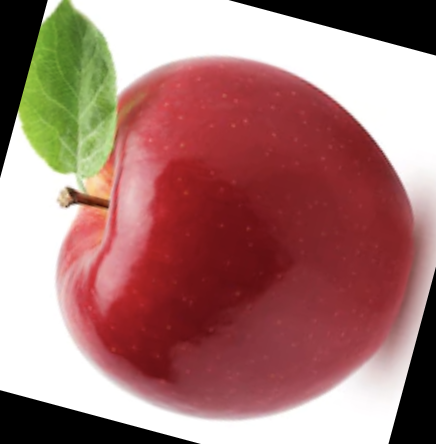

In [ ]:

import random
from IPython.display import Image, display

# Specify the path to your image folder
folder_path = '/content/output_dataset/train/Apple__Healthy'  # Replace with the actual path to your image folder

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Select a random image from the list
selected_image = random.choice(image_files)

# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

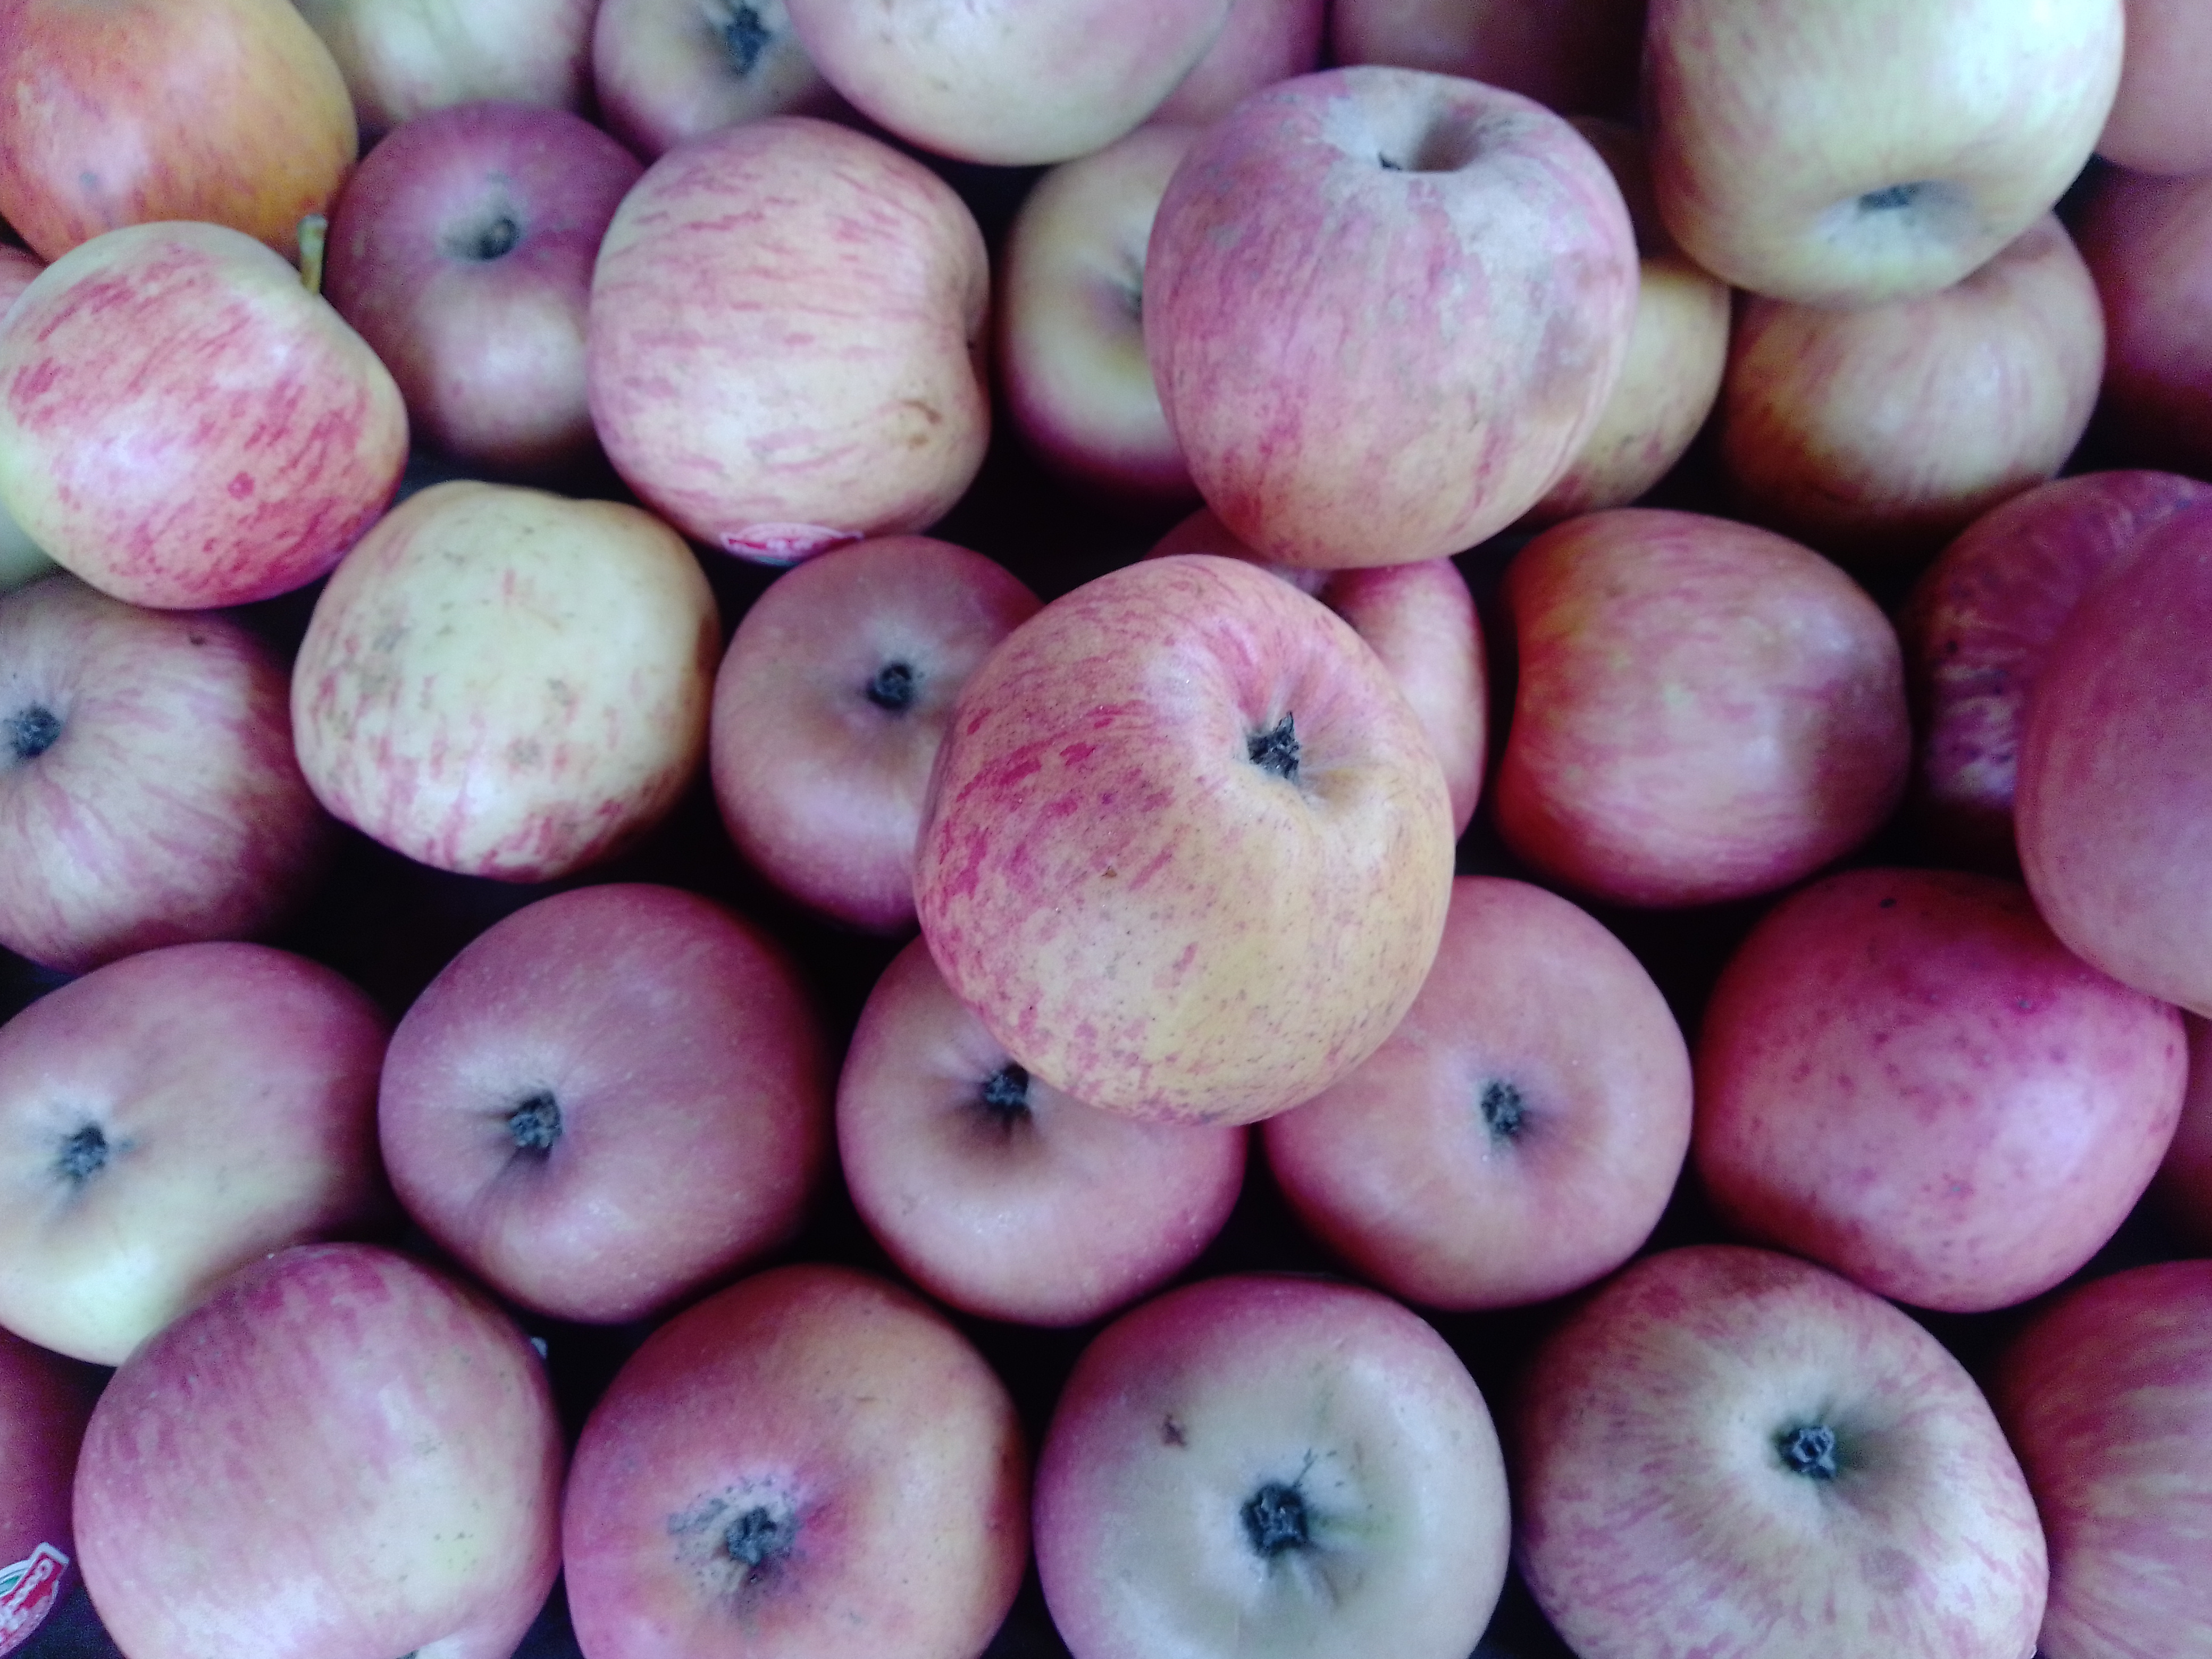

In [ ]:


# Specify the path to your image folder
folder_path = '/content/output_dataset/train/Apple__Healthy'  # Replace with the actual path to your image folder

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Select a random image from the list
selected_image = random.choice(image_files)

# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

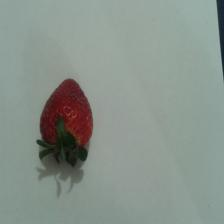

In [ ]:
# Specify the path to your image folder
folder_path = '/content/output_dataset/test/Strawberry__Healthy'  # Replace with the actual path to your image folder

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Select a random image from the list
selected_image = random.choice(image_files)

# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

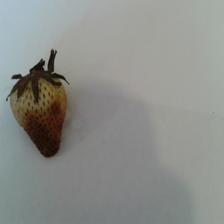

In [ ]:
# Specify the path to your image folder
folder_path = '/content/output_dataset/test/Strawberry__Rotten'  # Replace with the actual path to your image folder

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Select a random image from the list
selected_image = random.choice(image_files)

# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

In [ ]:
# Specify the path to your image folder
folder_path = '/content/output_dataset/test/Cucumber__Rotten'  # Replace with the actual path to your image folder

# List all files in the folder
image_files = [f for f in os.listdir(folder_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

# Select a random image from the list
selected_image = random.choice(image_files)

# Display the randomly selected image
image_path = os.path.join(folder_path, selected_image)
display(Image(filename=image_path))

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

In [ ]:
vgg = VGG16(include_top = False,input_shape = (224,224,3))

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
for layer in vgg.layers:
  print(layer)

In [ ]:
len(vgg.layers)

19

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
x= Flatten()(vgg.output)

In [ ]:
output = Dense(28, activation ='softmax')(x)

In [ ]:
vgg16 = Model(vgg.input,output)

In [ ]:
vgg16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
opt = Adam(lr=0.0001)

# Assuming you have defined your VGG16 model as vgg16

# Define Early Stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

# Compile the model (you may have already done this)
vgg16.compile(optimizer = 'Adam' , loss='categorical_crossentropy', metrics=['accuracy'])


# # Train the model with early stopping callback
history = vgg16.fit(train, validation_data=test,
                    epochs=15,
                   steps_per_epoch=20,
                 callbacks=[early_stopping])

Epoch 1/15
20/20 [==============================] - 815s 42s/step - loss: 2.8585 - accuracy: 0.4150 - val_loss: 2.1163 - val_accuracy: 0.5384
Epoch 2/15
20/20 [==============================] - 808s 42s/step - loss: 1.8113 - accuracy: 0.5725 - val_loss: 1.4605 - val_accuracy: 0.5830
Epoch 3/15
20/20 [==============================] - 806s 42s/step - loss: 1.2257 - accuracy: 0.6675 - val_loss: 1.4561 - val_accuracy: 0.6295
Epoch 4/15
20/20 [==============================] - 803s 42s/step - loss: 1.1124 - accuracy: 0.6925 - val_loss: 1.1895 - val_accuracy: 0.6545
Epoch 5/15
20/20 [==============================] - 838s 43s/step - loss: 0.9566 - accuracy: 0.7525 - val_loss: 1.3254 - val_accuracy: 0.6420
Epoch 6/15
20/20 [==============================] - 811s 42s/step - loss: 0.9893 - accuracy: 0.7150 - val_loss: 1.3327 - val_accuracy: 0.6250
Epoch 7/15
11/20 [===============>..............] - ETA: 1:36 - loss: 1.1216 - accuracy: 0.7136

KeyboardInterrupt: 

In [ ]:
vgg16.save('healthy_vs_rotten')

# **Testing the data**

In [ ]:

labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]

# **Testing class - 1**

In [ ]:
img_path = '/content/output_dataset/train/Bellpepper__Healthy/freshPepper (104).jpg'

In [ ]:
import numpy as np
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg16.predict(np.array([x]))
preds

1/1 [==============================] - 0s 128ms/step


array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
labels[np.argmax(preds)]

4

# **Testing class-2**

In [ ]:
img_path = '/content/output_dataset/train/Mango__Rotten/153.jpg'

In [ ]:
import numpy as np
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg16.predict(np.array([x]))
preds

1/1 [==============================] - 0s 19ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
labels[np.argmax(preds)]

17

# **Testing class-3**

In [ ]:
img_path ='/content/output_dataset/train/Orange__Healthy/Screen Shot 2018-06-12 at 11.55.05 PM.png'

In [ ]:
import numpy as np
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg16.predict(np.array([x]))
preds

1/1 [==============================] - 0s 21ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
labels[np.argmax(preds)]

12

# **Testing class-4**

In [ ]:
img_path ='/content/output_dataset/train/Cucumber__Healthy/freshCucumber (127).jpg'

In [ ]:
import numpy as np
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg16.predict(np.array([x]))
preds

1/1 [==============================] - 0s 20ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
labels[np.argmax(preds)]

8

# **Testing class-5**

In [ ]:
img_path ='/content/output_dataset/train/Potato__Rotten/rottenPotato (113).jpg'

In [ ]:
import numpy as np
img = load_img(img_path, target_size=(224, 224))
x = img_to_array(img)
x = preprocess_input(x)
preds = vgg16.predict(np.array([x]))
preds

1/1 [==============================] - 0s 21ms/step


array([[0.000000e+00, 0.000000e+00, 0.000000e+00, 5.546745e-37,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 1.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00]],
      dtype=float32)

In [ ]:
labels[np.argmax(preds)]

23